<!-- Remember to:
* Produce an Html version of the notebooks so that they can use it as a webpage without needing to run code.
* Distribute both notebook and webpage.
* Recall alert cells
* find standard first cell.
-->

<img src = "https://www.hh.se/images/18.4ad3d9ee1656d0f05ef643a3/1550842090193/hh-logo.svg" width = "150" align = "left">  
<br>
<br>
<center><b>Algorithms, Data Structures and Problem Solving</b></center>
<center> <img src = "https://www.link.cs.cmu.edu/splay/tree5.jpg" width = "200"></center>
<center><i>A Self-Adjusting Search Tree</i></center>
<center><i>by Jorge Stolfi</i></center>
<br>
<center><b>Divide and Conquer and Execution Time Analysis</b></center>

This notebook provides you with material for self-study for the second week of the course. It includes recordings by Tim Roughgourden and programs in Python that illustrate in a more concrete way what he discusses. The videos take about 2 hours, so please make time to work through this notebook.

We will discuss this material during the online sessions in smaller groups so that any things that you did not understand or that you would like to comment or wonder about can be brought up during these sessions. Please notice that your contributions to the online sessions can help both you and your fellow students!

All videos are from the material Tim Roughgarden distributes to accompany his book series. A playlist and all videos are available via [http://www.algorithmsilluminated.org/ ]

<div class="alert alert-block alert-warning">



The topics _Divide and Conquer_ and _Execution Time Analysis_ are introduced with an example: _Mergesort_. The following two short videos (9 and 13 minutes) give a motivation for why the algorithm is worth studying and develop a _pseudocode_ version. 

It is worth noting that the sorting function (```sorted```) and method (```sort```) in Python use an algorithm (timsort) that is based on mergesort (as is Java's algorithm).

After the videos you will find a complete implementation of mergesort, borrowed from [https://introcs.cs.princeton.edu/python/home/ ]

</div>

<hr style="border:1px solid silver"> </hr>

[![](http://img.youtube.com/vi/kiyRJ7GVWro/0.jpg)](http://www.youtube.com/watch?v=kiyRJ7GVWro "")

<hr style="border:1px solid silver"> </hr>

[![](http://img.youtube.com/vi/rBd5w0rQaFo/0.jpg)](http://www.youtube.com/watch?v=rBd5w0rQaFo "") 

<hr style="border:1px solid silver"> </hr>

<div class="alert alert-block alert-warning">

And now the programs. We want ```mergesort```to have only one argument: the array. But we need two more arguments to be able to make the recursive calls. That is why we use an auxiliary function ```_sort``` that we call from ```mergesort```. The function ```_sort``` takes the array, the indices that mark the fragment of the array we plan to sort, and an empty array to be able to merge the two halves that get sorted recursively. 

**Recommendation**: start reading from the bottom, first ```mergesort``` then ```_sort``` (that is the mergesort algorithm that Tim explains) and finally ```_merge``` (the algorithm that Tim explains) 

</div>

In [1]:
def _merge(a, lo, mid, hi, aux):
    n = hi - lo
    i = lo
    j = mid
    # use aux[0:n] to merge the two parts a[lo:mid] and a[mid:hi]
    for k in range(n):
        if i == mid:
            aux[k] = a[j]
            j += 1
        elif j == hi:
            aux[k] = a[i]
            i += 1
        elif a[j] < a[i]:
            aux[k] = a[j]
            j += 1
        else:
            aux[k] = a[i]
            i += 1
    # update a with the merged parts
    a[lo:hi] = aux[0:n]
    
def _sort(a, lo, hi, aux):
    n = hi - lo
    if n <= 1: # base case: nothing left to do
        return
    # To the meat of the algorithm. Notice the two recursive calls.
    mid = (lo + hi) // 2 
    _sort(a, lo, mid, aux)
    _sort(a, mid, hi, aux)
    _merge(a, lo, mid, hi, aux)
    
def mergesort(a):
    n = len(a)
    aux = [None] * n    # an empty array of length n
    _sort(a, 0, n, aux) # a and aux have places indexed 0 ... (n-1)

In [2]:
# a small example
import random
a = list(range(10))
random.shuffle(a)
print(a)
aux = [0] * len(a)
# lo is 2, hi is 8 (a[2] ... a[7])
_sort(a, 2, 5, aux)
print(a)
_sort(a, 5, 8, aux)
print(a)
_merge(a, 2, 5, 8, aux)
print(a)

[6, 4, 0, 1, 5, 7, 9, 2, 8, 3]
[6, 4, 0, 1, 5, 7, 9, 2, 8, 3]
[6, 4, 0, 1, 5, 2, 7, 9, 8, 3]
[6, 4, 0, 1, 2, 5, 7, 9, 8, 3]


In [3]:
# another way of doing it using the built in function sorted.
# sorted returns a new array that is a sorted version of a. 
# It does not modify a (check it in another cell)

a = list(range(1000000))
random.shuffle(a)
b = sorted(a)
# mergesort modifies a!
mergesort(a)
# now a and b should be equal: both sorted!
print(a == b)

True


In [4]:
# more serious testing that exploits the previous idea.

# generator(m,n) 
# returns an array with n random integers in the [-m, m) range
# with m large for n, few repetitions
def generator(m, n):
    a = [0] * n
    for i in range(n):
        a[i] = random.randrange(-m, m)
    return a

def test_mergesort(times):
    for i in range(times):
        size = random.randrange(0, 100000)
        a = generator(10*size, size)
        b = sorted(a) 
        mergesort(a)
        if not a == b: 
            print('Test failed for size:', size)
            return;
    print('All tests passed')

In [5]:
# takes some time!
# 100 tests with random arrays that have sizes between 0 and 100000 
test_mergesort(100)

KeyboardInterrupt: 

<div class="alert alert-block alert-warning">
    
The following recording (9 minutes) introduces you to the study of how fast functions grow. 

After the video you will find a program that plots a number of functions and a program that explores how many times you can divide by two to get to 1.
    
</div>

<hr style="border:1px solid silver"> </hr>

[![](http://img.youtube.com/vi/8ArtRiTkYEw/0.jpg)](http://www.youtube.com/watch?v=8ArtRiTkYEw "")

<hr style="border:1px solid silver"> </hr>

<div class="alert alert-block alert-warning">

And now the programs. First to explore some functions and then the interactive game Twenty Questions that should give you a sense of how slowly the logarithmic function grows.

Inspect the graphs generated for the six functions below. They are meant to show you how fast they grow (some of them do not grow very fast while others do). In order to make more sense of the last graph you might want to go to the code for ```plotGrowth``` and comment away the lines that plot the functions that grow faster! This should help you understand what Tim says about being interested in big sizes and not interested in leading constants. The function ```plotGrowth``` is just a way of using the computer to gain understanding of a math concept.

</div>

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import math

def plotGrowth(start, end, step):
    fig, ax = plt.subplots()
    
    # all functions in the plot use the same x-values, the values in the array n
    # the values in the y-axis are given by arrays calculated with list comprehensions
    # (see the first and second arguments of ax.plot)
    
    size = math.floor((end - start) / step)
    n = [start + x * step for x in range(size)]
    
    ax.plot(n, [math.log2(x) for x in n],     color = 'red')    # logarithmic
    ax.plot(n, n,                             color = 'blue')   # linear
    ax.plot(n, [x * math.log2(x) for x in n], color = 'green')  # linearithmic
    # for big numbers values of end you might want to comment the three lines below 
    # after seeing the three graphs below.
    ax.plot(n, [x ** 2 for x in n],           color = 'brown')  # quadratic
    ax.plot(n, [x ** 3 for x in n],           color = 'black')  # cubic
    ax.plot(n, [2 ** x for x in n],           color = 'orange') # exponential

    plt.show()

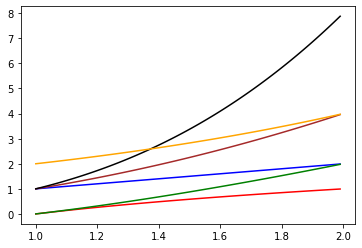

In [8]:
plotGrowth(1, 2, 0.01)

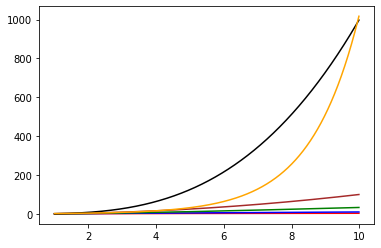

In [9]:
plotGrowth(1, 10, 0.01)

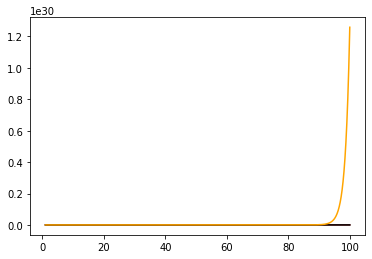

In [12]:
plotGrowth(1, 100, 0.01)

In [ ]:
def _search(lo, hi):
    if (hi - lo) == 1:
        return lo
    mid = (hi + lo) // 2
    
    s = input('Is your number greater than or equal to ' + str(mid) + '?  ')
    if s == 'y':
        return _search(mid, hi)
    else:
        return _search(lo, mid)
    
def twenty_questions():
    n = 10 ** 6
    print('Think of a number between 0 and 1000000')
    print('Then answer with y/n')
    guess = _search(0, n)
    print('Your number is ' + str(guess))

In [ ]:
twenty_questions()

If you think about it, the previous algorithm finds out your guess by searching for your number among 1 000 000 numbers and it uses only 20 questions! it uses the fact that the set of numbers is ordered and that by knowing on what half of the interval your number is, it can discard half of the remaining numbers. So, after your first answer it has only 500 000 numbers left to inspect, after your second answer only 250 000, after your third answer only 125 000 etc. How many times can you divide by two before getting to 1 (the number it is looking for!)? Well, this is exactly the definition of logarithm in base 2! And $log_2$(1 000 000) is 19.931568569324174 (another way of seeing it: $2^{20}$ is 1 048 576)

<div class="alert alert-block alert-warning">
    
The following recording (15 minutes) introduces you to the guiding principles of execution time analysis.

After watching the video you should try to modify the implementation of mergesort above so that for small arrays (say less than 10 elements) it uses insertion sort. This modification only affects the base case! You find an implementation of insertion sort after the video. Why is it a good idea to do this?
    
</div>

<hr style="border:1px solid silver"> </hr>

[![](http://img.youtube.com/vi/-yP11jqilwM/0.jpg)](http://www.youtube.com/watch?v=-yP11jqilwM "")

<hr style="border:1px solid silver"> </hr>

<div class="alert alert-block alert-warning">
    
So, here is insertion sort that you will need in order to modify the base case of merge sort. Move the definition to the cell containing ```mergesort```, ```_sort``` and ```_merge```.

</div>

In [ ]:
def _insertionsort(a):
    n = len(a)
    for i in range(1, n):
        j = i
        while (j > 0) and (a[j] < a[j-1]):
            a[j-1], a[j] = a[j], a[j-1]
            j -= 1

<div class="alert alert-block alert-warning">

The following recording (14 minutes) explains how to look at an algorithm to calculate its execution time. All the examples described in the video are shown as Python programs in the following cells. Maybe you might want to pause the video and play with the program discussed before moving on in the video.

</div>

<hr style="border:1px solid silver"> </hr>

[![](http://img.youtube.com/vi/l-cNaKGc-yY/0.jpg)](http://www.youtube.com/watch?v=l-cNaKGc-yY "")

<hr style="border:1px solid silver"> </hr>

<div class="alert alert-block alert-warning">
    
And now the examples from the lecture as Python programs.

</div>

In [14]:
# One loop
def linear_search(a, t):
    n = len(a)
    for i in range(n):
        if a[i] == t: return True
    return False

In [29]:
arr = list(range(1000000))
linear_search(arr, -1)

False

In [21]:
# Two loops
# Arrays a and b are of the same length
def combined_linear_search(a, b, t):
    n = len(a)
    for i in range(n):
        if a[i] == t: return True
    for i in range(n):
        if b[i] == t: return True
    return False

In [30]:
brr = list(range(len(arr)))
combined_linear_search(arr,brr,-1)

False

In [31]:
# Two nested loops (I)
# Arrays a and b are of the same length
def common_element(a, b):
    n = len(a)
    for i in range(n):
        for j in range(n):
            if a[i] == b[j]: return True
    return False

In [36]:
n = 10000
arr = list(range(n))
brr = list(range(n, 2*n))
common_element(arr, brr)

False

In [ ]:
# Two nested loops (II)
def duplicates(a):
    n = len(a)
    for i in range(n):
        for j in range(i+1,n):
            if a[i] == a[j]: return True
    return False

<div class="alert alert-block alert-warning">

The following recording (4 minutes) introduces the Big O notation. You have to think of teh function T(n) he uses along the lecture as the function giving you the execution time of your program in terms of the size of the input (and not the input itself). This function is something you can obtain by experimenting. In the lab that you have to do for next week you will be experimenting with a program (quicksort) meassuring execution time to obtain T(n) for quicksort and compareing it with the analysis that gives you the Big O behaviour of quicksort.

After the video is a short piece of code that shows how you can obtain a fragment of T(n) for a program.
    
</div>

<hr style="border:1px solid silver"> </hr>

[![](http://img.youtube.com/vi/QfRSeibcugw/0.jpg)](http://www.youtube.com/watch?v=QfRSeibcugw "")

<hr style="border:1px solid silver"> </hr>

<div class="alert alert-block alert-warning">

And now how to meassure execution time and obtaining a fragment of T(n) by experimenting with the program.

</div>

In [ ]:
import time
import math
def experiment(f, size, iters):
    all = [None] * iters
    for i in range(0, iters):
        a = generator(10000, size)
        t = time.time()
        f(a)
        t = time.time() - t
        all[i] = [size, t]
        size = 2 * size
    return all # a list with (sizes, times)

In [ ]:
# Experiment with duplicates with arrays of sizes 100, 2*100, 2*2*100, ... 10 times
experiment(duplicates, 100, 10) 

<div class="alert alert-block alert-warning">

The final two recordings (13 and 17 minutes) present the problem of counting inversions and two algorithms: a so called _Brute Force_ algorithm and a _Divide and Conquer_ algorithm. The lecture includes an execution time analysis of both. It also includes a description of _Divide and Conquer_ as a way of comming up with recursive algorithms.

After the video you find the programs for both algorithms.

</div>

<hr style="border:1px solid silver"> </hr>

[![](http://img.youtube.com/vi/7_AJfusC6UQ/0.jpg)](http://www.youtube.com/watch?v=7_AJfusC6UQ "")

<hr style="border:1px solid silver"> </hr>

[![](http://img.youtube.com/vi/I6ygiW8xN7Y/0.jpg)](http://www.youtube.com/watch?v=I6ygiW8xN7Y "")

<hr style="border:1px solid silver"> </hr>

<div class="alert alert-block alert-warning">
    
Finally, the two programs for counting inversions.

</div>

In [ ]:
# Brute force
def bf_count_inversions(a):
    n = len(a)
    inversions = 0
    for i in range(n):
        for j in range(i+1, n):
            if a[j] < a[i]: inversions += 1
    return inversions
# Try some experiments with the execution times. Can you see that it is quadratic?

In [ ]:
# Divide and conquer
def dc_count_inversions(a):
    # We leave this as an exercise to discuss on the coding session!
    return 0